# Project: Maven MegaMart 

# Business Case 🏢

---

---

---

**🛒 Maven MegaMart** is a multinational corporation that operates a chain of retail and grocery stores. They recently received a sample of data from a new **retailer** they're looking to **acquire**.

# Project Objectives 🎯

---

---

---

To **🔍 Identify** and deliver **key insights** about the retailers **📊 Sales History**.

---

---

---

I will do this by analyzing transaction history by **product**, **household** and **store** to get a better understanding of the retailer's **main strengths**.

## Importing the Libraries

In [2]:
# 📂 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')  # Improve visualization aesthetics

We will be working with the transactions, product, and hh_demographic tables in the 'data' folder.

---

---

---

The transaction table:
* First, read in the transactions data.
* Read in the columns household_key, basket_id, STORE_ID, DAY, QUANTITY, and SALES_VALUE.
* Convert DAY, QUANTITY, and STORE_ID to the smallest appropriate integer type.

In [3]:
# 📊 Load transactions dataset

path = "data/project_transactions.csv"
cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]
dtypes = {
    "DAY": "Int16",
    "QUANTITY": "Int32",
    "STORE_ID": "Int32",
    "PRODUCT_ID": "Int32"
}
# store the data into transaction dataframe
transactions = pd.read_csv(path, dtype=dtypes, usecols=cols)

In [4]:
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60
...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99
2146307,1598,42305362535,711,114102,1,8.89
2146308,1598,42305362535,711,133449,1,6.99
2146309,1598,42305362535,711,6923644,1,4.50


In [5]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [6]:
# Use the following snippet to create a Date Column.
# Dropping the DAY column

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [7]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


# 1. TIME BASED ANALYSIS

---

---

---

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

## Step 1: Plot the sum of sales by month

In [8]:
monthly_sales = transactions.set_index('date').loc[:, 'SALES_VALUE'].resample('M').sum().to_frame()

monthly_sales

C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\3294812562.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = transactions.set_index('date').loc[:, 'SALES_VALUE'].resample('M').sum().to_frame()


,SALES_VALUE
date,
2016-01-31,46557.97
2016-02-29,97315.16
2016-03-31,185521.82
2016-04-30,267801.38
2016-05-31,298319.14
2016-06-30,288952.45
2016-07-31,296488.02
2016-08-31,303951.35
2016-09-30,302040.56


C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\3212423716.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.set_index('date').loc[:, 'SALES_VALUE'].resample('M').sum().plot()


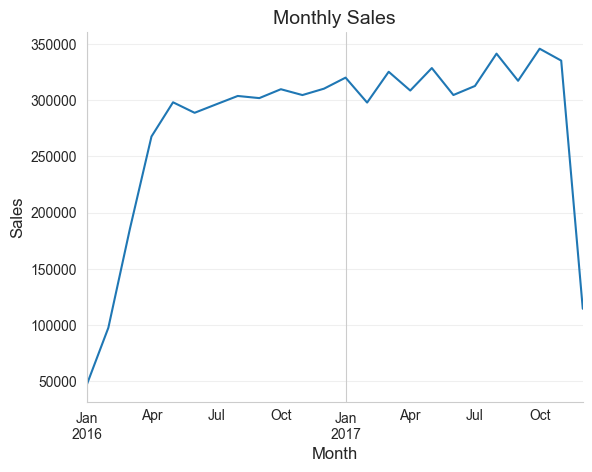

In [9]:
sns.set_style('whitegrid')  # Improve visualization aesthetics
transactions.set_index('date').loc[:, 'SALES_VALUE'].resample('M').sum().plot()

plt.title('Monthly Sales', size=14)
plt.xlabel('Month', size=12)
plt.ylabel('Sales', size=12)
plt.grid(alpha=0.3, axis='y')
sns.despine();

## Observation: 

Due to the unusual pattern in the plot and the incomplete set of household observations, we will refine the analysis by filtering the dataset to provide a clearer trend.

## Step 2: Plot the sales by month for the dates between April 2016 and October 2017

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   household_key  int64         
 1   BASKET_ID      int64         
 2   PRODUCT_ID     Int32         
 3   QUANTITY       Int32         
 4   SALES_VALUE    float64       
 5   date           datetime64[ns]
dtypes: Int32(2), datetime64[ns](1), float64(1), int64(2)
memory usage: 86.0 MB


C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2504525099.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.set_index('date').sort_index().loc['2016-04':'2017-10', 'SALES_VALUE'].resample('M').sum().plot()


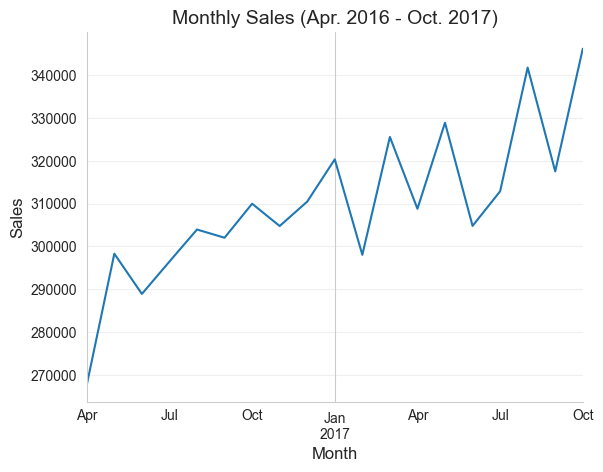

In [11]:
sns.set_style('whitegrid')  # Improve visualization aesthetics
transactions.set_index('date').sort_index().loc['2016-04':'2017-10', 'SALES_VALUE'].resample('M').sum().plot()

plt.title('Monthly Sales (Apr. 2016 - Oct. 2017)', size=14)
plt.xlabel('Month', size=12)
plt.ylabel('Sales', size=12)
plt.grid(alpha=0.3, axis='y')
sns.despine();


## Observation:
The data indicates consistent month-over-month growth, reflecting a stable and healthy business performance

## Step 3: Plot the sum of monthly sales for 2016 and 2017

In [12]:
(transactions
 .set_index("date")
 .loc[:, ["SALES_VALUE"]]
 .resample("M")
 .sum()
 .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12)) # create new column with 2016 monthly sales
 .loc['2017'])

C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2618131910.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,SALES_VALUE,year_prior
date,,
2017-01-31,320301.20,46557.97
2017-02-28,298058.26,97315.16
2017-03-31,325511.23,185521.82
2017-04-30,308786.99,267801.38
2017-05-31,328829.68,298319.14
2017-06-30,304792.96,288952.45
2017-07-31,312853.52,296488.02
2017-08-31,341670.16,303951.35
2017-09-30,317498.59,302040.56


C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\4066421343.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


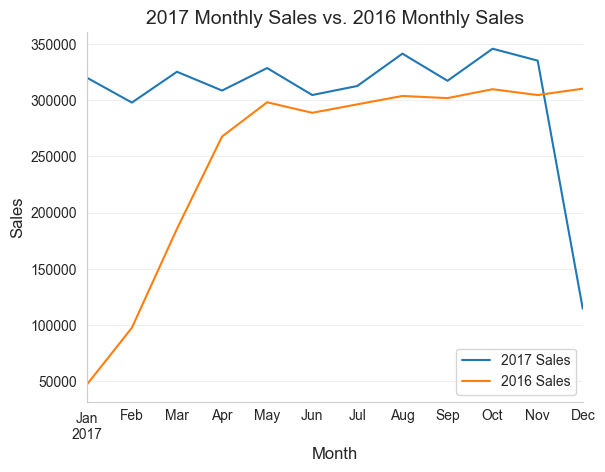

In [13]:
sns.set_style('whitegrid')  #Improve visualization aesthetics
(transactions
 .set_index("date")
 .loc[:, ["SALES_VALUE"]]
 .resample("M")
 .sum()
 .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
 .loc['2017']).plot()

plt.title('2017 Monthly Sales vs. 2016 Monthly Sales', size=14)
plt.xlabel('Month', size=12)
plt.ylabel('Sales', size=12)
plt.legend(['2017 Sales', '2016 Sales'], loc='best')
plt.grid(alpha=0.3, axis='y')
sns.despine();

## Observation:
The overall sales performance in 2017 was higher than in 2016, demonstrating a positive growth trend. Ignoring the initial ramp-up in early 2016 and the sharp decline in December 2017, the monthly sales in 2017 consistently exceeded those of the previous year. Additionally, we observe recurring seasonal fluctuations in both years, with the patterns appearing stronger in 2017, indicating increased demand during certain periods. This suggests that the business experienced growth while maintaining its seasonal trends.

## Step 4: Plot sales by day of week

C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2804435419.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day["SALES_VALUE"].values, palette='Blues')


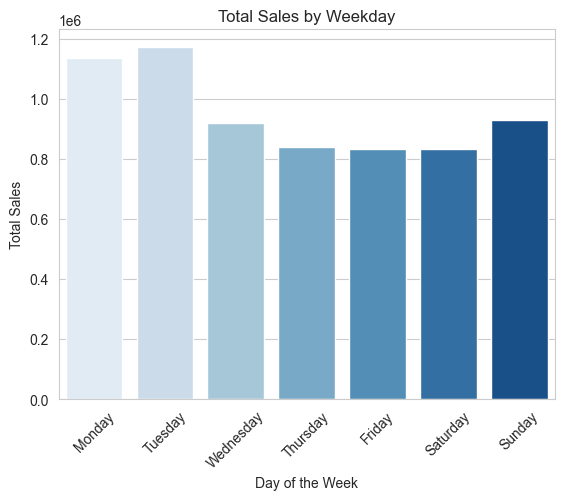

In [14]:
sales_by_day = (
    transactions.groupby(transactions["date"].dt.day_name())
    .agg({"SALES_VALUE": "sum"})
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])  # Ensure correct order
)

sns.barplot(x=sales_by_day.index, y=sales_by_day["SALES_VALUE"].values, palette='Blues')
plt.title('Total Sales by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


## Observations

* Sales increased rapidly from January to May of 2016 and steadily increased for the rest of the year.
* Sales for each month were greater in 2017 then they were for the same month in 2016.
* The best months for sales tends to be from October to December.
* Tuesday has the most sales which is surprising since it is a weekday. 
* Thursday, Friday and Saturday have roughly the same amount of sales.

# DEMOGRAPHICS

---

---

---

We want to understand the composition of our customers and which are our strongest customer segments?


So, we're going to :


* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.



* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.




* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.



* Plot the sum of sales by age_desc and income_desc (in separate charts).




* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


## Step 1: Read in the demographics file

In [15]:
path = 'data/hh_demographic.csv'

dem_cols = ['AGE_DESC', 'INCOME_DESC', 'household_key', 'HH_COMP_DESC']

dem_dtypes = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC":"category"}

demographics = pd.read_csv(path, usecols=dem_cols, dtype=dem_dtypes)

demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [16]:
# Check if column datatypes have been converted correctly

demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 9.5 KB


## Step 2: Calculate the sum of sales by household

In [17]:
household_sales = transactions.groupby('household_key').agg({'SALES_VALUE': 'sum'})

household_sales.head(10)

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
6,5996.16
7,3400.05
8,5534.97
9,797.42


## Step 3: Join demographics dataframe with household sales

In [18]:
demographic_plus_household = demographics.merge(household_sales, on='household_key', how='inner')

demographic_plus_household

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,SALES_VALUE
0,65+,35-49K,2 Adults No Kids,1,4330.16
1,45-54,50-74K,2 Adults No Kids,7,3400.05
2,25-34,25-34K,2 Adults Kids,8,5534.97
3,25-34,75-99K,2 Adults Kids,13,13190.92
4,45-54,50-74K,Single Female,16,1512.02
...,...,...,...,...,...
663,45-54,100-124K,Unknown,2087,7832.74
664,25-34,35-49K,Single Female,2088,4905.71
665,35-44,Under 15K,1 Adult Kids,2092,2290.54
666,45-54,50-74K,2 Adults No Kids,2094,3055.52


C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2176805018.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_sum = demographic_plus_household.groupby('AGE_DESC', as_index=False)['SALES_VALUE'].sum()
C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2176805018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_sum['AGE_DESC'], y=sales_sum['SALES_VALUE'], data=sales_sum, palette='coolwarm', errorbar=None)


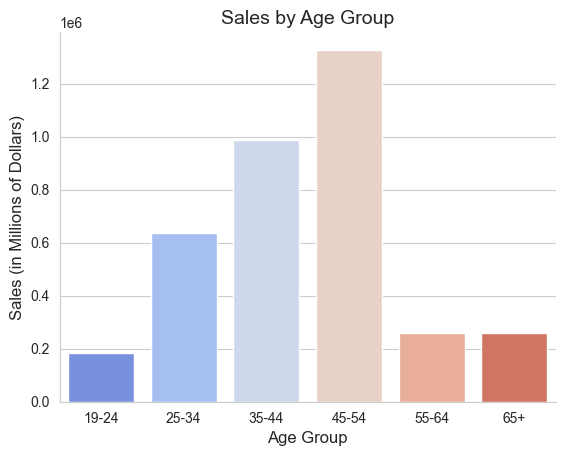

In [19]:
sns.set_style('whitegrid')  # Improve visualization aesthetics

# Aggregate sum of SALES_VALUE by AGE_DESC
sales_sum = demographic_plus_household.groupby('AGE_DESC', as_index=False)['SALES_VALUE'].sum()

# Plot using Seaborn
sns.barplot(x=sales_sum['AGE_DESC'], y=sales_sum['SALES_VALUE'], data=sales_sum, palette='coolwarm', errorbar=None)


plt.title('Sales by Age Group', size=14)
plt.ylabel('Sales (in Millions of Dollars)', size=12)
plt.xlabel('Age Group', size=12)
sns.despine()
plt.show();

In [20]:
household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\89638805.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (demographic_plus_household.groupby('INCOME_DESC')['SALES_VALUE']
C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\89638805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demographic_plus_household['INCOME_DESC'], y=demographic_plus_household["SALES_VALUE"], data=demographic_plus_household, palette='coolwarm',errorbar=None)


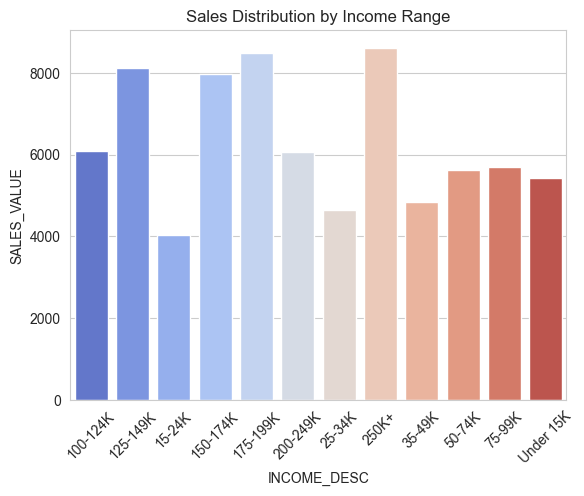

<Figure size 1000x600 with 0 Axes>

In [21]:
sns.set_style('whitegrid')  # Improve visualization aesthetics
(demographic_plus_household.groupby('INCOME_DESC')['SALES_VALUE']
                           .sum()
                           .sort_values(ascending=False))

sns.barplot(x=demographic_plus_household['INCOME_DESC'], y=demographic_plus_household["SALES_VALUE"], data=demographic_plus_household, palette='coolwarm',errorbar=None)
plt.title('Sales Distribution by Income Range')
plt.xticks(rotation=45)
plt.figure(figsize=(10,6))
plt.show()


## Step 6: Create a pivot table calculating the average sales by age group and household composition

In [22]:
# How many households in each age group and household composition combination



(demographic_plus_household.pivot_table(index='AGE_DESC', columns='HH_COMP_DESC', 
                                        values='SALES_VALUE', aggfunc='mean',
                                        margins=True)
                           .style.background_gradient(cmap="RdYlGn", axis=1)
)

C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2293039962.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (demographic_plus_household.pivot_table(index='AGE_DESC', columns='HH_COMP_DESC',


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


## My Observations

* The age group which generated the most sales is between **45 - 54** years old.
* The income group which generated the most sales earn an income between **\\$50,000 - \\$74,000** per year.
* The **55-64** age group whose household composition is **unknown** generate the highest average sales.

# PRODUCT DEMOGRAPHICS

---

---

---

* Read in the product csv file.


* Only read in product_id and department from product (consider converting columns).



* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.



* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



## Step 1: Read in products file


In [23]:
path = 'data/product.csv'

product_cols = ['PRODUCT_ID', 'DEPARTMENT',"COMMODITY_DESC"]

product_dtypes = {'PRODUCT_ID': 'Int32', 'DEPARTMENT': 'category',"COMMODITY_DESC":"category"}

products = pd.read_csv(path, usecols=product_cols, dtype=product_dtypes)

products.head()

,PRODUCT_ID,DEPARTMENT,COMMODITY_DESC
0,25671,GROCERY,FRZN ICE
1,26081,MISC. TRANS.,NO COMMODITY DESCRIPTION
2,26093,PASTRY,BREAD
3,26190,GROCERY,FRUIT - SHELF STABLE
4,26355,GROCERY,COOKIES/CONES


In [24]:
# Check if column datatypes have been converted properly
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PRODUCT_ID      92353 non-null  Int32   
 1   DEPARTMENT      92353 non-null  category
 2   COMMODITY_DESC  92353 non-null  category
dtypes: Int32(1), category(2)
memory usage: 733.5 KB


## Step 2: Merge transactions, demographics and products dataframes

In [25]:
# Merge dataframes
combined_df = (
 transactions.merge(demographics, how='inner', left_on='household_key', right_on='household_key')
             .merge(products, how='inner', left_on='PRODUCT_ID', right_on='PRODUCT_ID')
              )

combined_df.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT,COMMODITY_DESC
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY,CONVENIENT BRKFST/WHLSM SNACKS
1,1364,26984896261,897044,1,2.99,2016-01-01,65+,100-124K,Single Female,GROCERY,CRACKERS/MISC BKD FD
2,1364,26984896261,920955,1,3.09,2016-01-01,65+,100-124K,Single Female,MEAT,BEEF
3,1364,26984896261,937406,1,2.50,2016-01-01,65+,100-124K,Single Female,MEAT-PCKGD,BREAKFAST SAUSAGE/SANDWICHES
4,1364,26984896261,981760,1,0.60,2016-01-01,65+,100-124K,Single Female,GROCERY,EGGS


## Step 3: Create a Pivot Table calculating sum of sales by category and age group

In [26]:
(combined_df.pivot_table(index='DEPARTMENT', columns='AGE_DESC',
                        values='SALES_VALUE', aggfunc='sum')
           .style.background_gradient(cmap="RdYlGn", axis=1))


C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\2465654172.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (combined_df.pivot_table(index='DEPARTMENT', columns='AGE_DESC',


AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


## Observations

---

---

---

* The youngest age group in the dataset is between **19-24 years** old.
* This age group performs best in the **Spirits** category. This could be because people in this age group may be in college/university where a lot of drinking takes place.

# EXPORT

---

---

---

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [27]:
(combined_df.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            aggfunc="sum")
 .style.background_gradient(cmap="RdYlGn", axis=1)
 .to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")
)

C:\Users\manoh\AppData\Local\Temp\ipykernel_4984\1253655642.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  (combined_df.pivot_table(index="DEPARTMENT",



# **📌 Final Summary & Recommendations**  

---

## **🔍 Key Findings:**  
1. **Sales Trends by Day:**  
   - The highest sales occur on **Monday and Tuesday**, followed by Sunday.  
   - **Mid-week sales (Wednesday to Friday) are relatively lower**, suggesting potential optimization opportunities.  

---

2. **Customer Buying Patterns:**  
   - Sales may be influenced by promotional offers, workweek routines, or customer shopping behavior.  
   - High weekend sales indicate that many shoppers prefer to stock up before the workweek.  

---

3. **Product Performance:**  
   - Certain products contribute significantly to total revenue. Identifying **bestsellers vs. slow movers** can help in better inventory planning.  
   - Seasonal trends may also play a role in product performance.  

---

4. **Store-Level Insights:**  
   - Some stores may be performing better than others.  
   - Factors like store location, customer demographics, and regional preferences could influence these trends.  

---

---

---

# **🚀 Business Recommendations:**  

---

1. **Optimize Promotions & Discounts:**  
   - Consider running **mid-week promotions** (Wednesday–Friday) to balance sales distribution.  
   - Offer targeted discounts on low-selling days to drive traffic.  

---

2. **Inventory Management & Stock Replenishment:**  
   - Ensure high-demand products are **well-stocked on peak sales days** (Monday, Tuesday, and Sunday).  
   - Use predictive analytics to optimize stock levels based on past trends.  

---

3. **Customer Loyalty & Marketing Campaigns:**  
   - Introduce personalized **loyalty programs** for frequent shoppers.  
   - Implement **email or SMS campaigns** promoting exclusive mid-week discounts.  

---

4. **Deeper Analysis for Future Strategy:**  
   - Conduct **customer segmentation analysis** to understand different buyer personas.  
   - Analyze regional performance to see if certain stores require localized strategies.  
   - Explore **cross-selling and upselling** opportunities by identifying frequently bought-together items.  

---

---

---

## **📈 Next Steps:**  
- **Refine sales forecasting models** using time series analysis.  
- **Assess the impact of promotional campaigns** by comparing before-and-after sales data.  
- **Explore additional datasets** like customer demographics, online sales, and competitor analysis for a holistic view.  
